# Data Analyst Associate Case Study Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

*Write your description here*

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('pet_sales.csv')
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


### Data Validation

In [193]:
df.shape

(879, 9)

This dataframe contain 879 rows and 9 columns

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    object 
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 61.9+ KB


There is no null data in the dataframe

### Convert sales column from object to int

In [195]:
df['sales'] = df['sales'].str.replace("$","")

In [196]:
df['sales'] = df['sales'].str.replace(",","")

In [197]:
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0


In [198]:
df['sales'] = df['sales'].astype('int64')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        879 non-null    int64  
 1   product_category  879 non-null    object 
 2   sales             879 non-null    int64  
 3   price             879 non-null    float64
 4   vendor_id         879 non-null    object 
 5   pet_size          879 non-null    object 
 6   pet_type          879 non-null    object 
 7   rating            879 non-null    int64  
 8   re_buy            879 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 61.9+ KB


### Convert sales from object to int successfully

In [213]:
df.groupby('pet_type')['sales'].sum()

pet_type
bird        8246000
cat        40229000
dog        39699000
fish        8538000
hamster     2245000
rabbit      3090000
Name: sales, dtype: int64

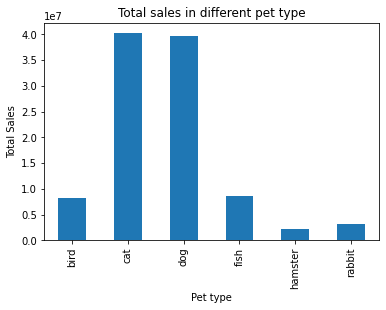

In [220]:
ax = df.groupby('pet_type')['sales'].sum().plot(kind='bar')
ax.set_xlabel('Pet type')
ax.set_ylabel('Total Sales')
ax.set_title('Total sales in different pet type');

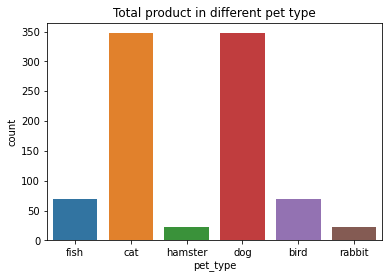

In [221]:
ax = sns.countplot(x='pet_type', data=df)
ax.set_title('Total product in different pet type');

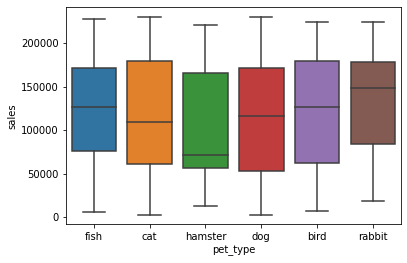

In [223]:
#also take a look at the medium number
sns.boxplot(x='pet_type', y='sales', data=df);

### There are more products/sales for dog and cat.

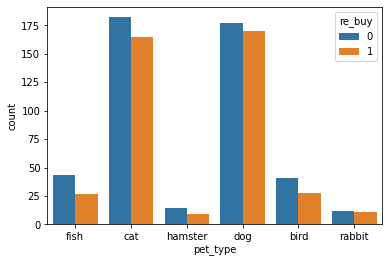

In [210]:
sns.countplot(x='pet_type', hue='re_buy', data=df);

### Form the chart, we can easily see there are more rebuy_0 product than rebuy_1 product

The marketing team would like to answer the following questions to help with the decision:
<br>
● How many products are being purchased more than once?
<br>
● Do the products being purchased again have better sales than others?
<br>
● What products are more likely to be purchased again for different types of pets?


In [200]:
print('Being purchased more than once :', (df['re_buy']>0).sum(), 'products')
print('Being purchased only once :', (df['re_buy']==0).sum(), 'products')

Being purchased more than once : 410 products
Being purchased only once : 469 products


### There are 410 products are being purchased more than once

In [201]:
df.groupby('re_buy')['sales'].sum()

re_buy
0    54271000
1    47776000
Name: sales, dtype: int64

### The sum of rebuy_0 is higher, but there are more products in this group, let's take a look the mean

In [202]:
df.groupby('re_buy')['sales'].mean()

re_buy
0    115716.417910
1    116526.829268
Name: sales, dtype: float64

<AxesSubplot:xlabel='re_buy'>

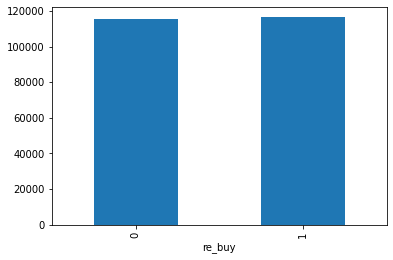

In [203]:
df.groupby('re_buy')['sales'].mean().plot(kind='bar')

### The mean of rebuy_1 is higher, let's use t test if 116526 is significant higher than 115716
<br>
Null hypothesis: rebuy_1 is the same for rebuy_0
<br>
Alternative hypothesis: rebuy_1 is greater than rebuy_0

In [82]:
xbar = df.groupby('re_buy')['sales'].mean()
xbar

re_buy
0    115716.417910
1    116526.829268
Name: sales, dtype: float64

In [83]:
s = df.groupby('re_buy')['sales'].std()
s

re_buy
0    67307.390337
1    65202.040799
Name: sales, dtype: float64

In [84]:
n = df.groupby('re_buy')['sales'].count()
n

re_buy
0    469
1    410
Name: sales, dtype: int64

In [86]:
numerator = xbar[1] - xbar[0]
denominator = np.sqrt(s[1]**2 / n[1] + s[0]**2 / n[0])
t_stat = numerator/ denominator
t_stat

0.1810845336013082

In [98]:
from scipy.stats import t
p_value = t.cdf(t_stat, df=n[1]+n[0]-2)
print(p_value)
if p_value < 0.05:
    print('reject null hypothesis')
else:
    print('cannot reject null hypothesis')

0.5718284679077552
cannot reject null hypothesis


### Cannot reject null hypothesis, the product being purchased more than once is not higher than the product being purchased once

## I will suggest that the marketing team could include the product with or without being perchased more than once for the pet box subscription. We could look deeper to rating and sales for the product for each pet type

In [151]:
#overview
df.groupby(['pet_type','re_buy'])[['rating','sales']].agg(['mean', 'sum'])

rating                sales          
                     mean   sum           mean       sum
pet_type re_buy                                         
bird     0       5.707317   234  118560.975610   4861000
         1       5.571429   156  120892.857143   3385000
cat      0       6.747253  1228  115587.912088  21037000
         1       6.509091  1074  116315.151515  19192000
dog      0       7.192090  1273  113627.118644  20112000
         1       6.070588  1032  115217.647059  19587000
fish     0       6.162791   265  118953.488372   5115000
         1       6.592593   178  126777.777778   3423000
hamster  0       6.428571    90  118785.714286   1663000
         1       4.888889    44   64666.666667    582000
rabbit   0       5.666667    68  123583.333333   1483000
         1       6.545455    72  146090.909091   1607000

In [162]:
df[df['pet_type'] == 'bird'].sort_values(['sales', 'rating'], ascending= False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
177,4266,Equipment,224000,241.46,VC_831,extra_large,bird,5,0
840,5013,Equipment,223000,191.52,VC_1578,medium,bird,6,0
544,4987,Snack,222000,18.36,VC_1552,medium,bird,6,0
493,4296,Accessory,221000,234.65,VC_861,extra_large,bird,8,1
863,4997,Toys,220000,176.38,VC_1562,medium,bird,6,0


### Conclusion: for bird, these 5 products are more likely to be purchased due to sales and rating

In [163]:
df[df['pet_type'] == 'cat'].sort_values(['sales','rating'], ascending=False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
67,4599,Housing,230000,75.45,VC_1164,large,cat,10,1
377,4627,Food,230000,211.91,VC_1192,small,cat,10,0
368,4723,Medicine,229000,62.65,VC_1288,medium,cat,10,0
16,4777,Snack,229000,45.23,VC_1342,medium,cat,7,0
852,4749,Food,229000,192.15,VC_1314,medium,cat,7,1


### Conclusion: for cat, these 5 products more likely to be purchased due to sales and rating

In [164]:
df[df['pet_type'] == 'dog'].sort_values(['sales','rating'], ascending=False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
42,4648,Accessory,230000,19.36,VC_1213,medium,dog,10,0
638,4340,Accessory,229000,18.51,VC_905,extra_small,dog,6,0
831,4430,Snack,229000,66.40,VC_995,extra_small,dog,6,1
438,4362,Accessory,229000,168.49,VC_927,small,dog,2,1
66,4426,Supplements,228000,241.41,VC_991,extra_large,dog,8,0


### Conclusion: for Dog, these 5 products are more likely to be purchased due to sales and rating

In [165]:
df[df['pet_type'] == 'fish'].sort_values(['sales','rating'], ascending=False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
223,4986,Equipment,228000,227.18,VC_1551,small,fish,6,0
564,5020,Snack,226000,219.18,VC_1585,small,fish,6,1
692,5010,Equipment,224000,31.47,VC_1575,small,fish,6,0
531,4990,Snack,221000,178.19,VC_1555,small,fish,6,0
792,5024,Toys,218000,178.31,VC_1589,small,fish,6,1


### Conclusion: for fish, these 5 products are more likely to be purchased due to sales and rating

In [166]:
df[df['pet_type'] == 'hamster'].sort_values(['sales','rating'], ascending=False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
229,4213,Bedding,221000,84.18,VC_778,medium,hamster,9,0
2,4237,Toys,218000,106.34,VC_802,small,hamster,6,0
416,4195,Supplements,211000,229.29,VC_760,extra_small,hamster,5,1
447,4231,Food,211000,121.16,VC_796,extra_large,hamster,5,0
570,4219,Accessory,171000,123.85,VC_784,large,hamster,8,0


### Conclusion: for hamster, these 5 products are more likely to be purchased due to sales and rating

In [167]:
df[df['pet_type'] == 'rabbit'].sort_values(['sales','rating'], ascending=False).head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
605,4306,Grooming,224000,140.57,VC_871,extra_large,rabbit,8,1
343,4174,Grooming,211000,104.27,VC_739,large,rabbit,4,1
65,4258,Housing,202000,183.43,VC_823,medium,rabbit,2,0
666,4180,Bedding,195000,207.05,VC_745,extra_small,rabbit,1,1
499,4204,Toys,182000,158.72,VC_769,large,rabbit,4,1


### Conclusion: for rabbit, these 5 products are more likely to be purchased due to sales and rating

### Visulualize the finding example for dog

<AxesSubplot:xlabel='product_id', ylabel='rating'>

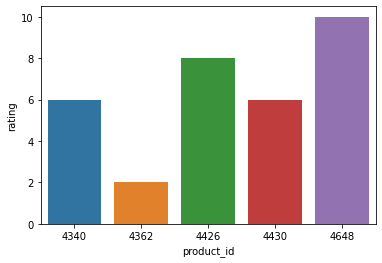

In [189]:
import seaborn as sns
dog = df[df['pet_type'] == 'dog'].sort_values(['sales','rating'], ascending=False).head(5)
sns.barplot(x='product_id', y='rating', data=dog)

<AxesSubplot:xlabel='product_id', ylabel='sales'>

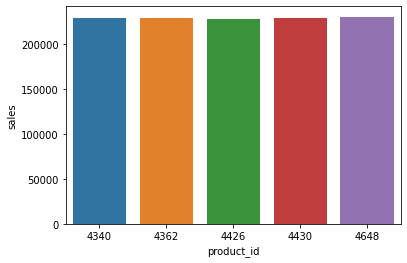

In [191]:
sns.barplot(x='product_id', y='sales', data=dog)

## Conclusion: rebuy is not a significant criteria to affect the sales, and from my exploring ove the dataset, the products which are being purchased only once does not mean it is not a recommended product, maybe because it is a product that only need to buy once.

## I suggest that the marketing team could include the product with or without being perchased more than once for the pet box subscription. And for different pet type, I suggest 5 products for each type based on sales and ranking of the product.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study